In [27]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
from torch.utils import data

In [28]:
T = 1000
x = torch.arange(1,T+1)
y = torch.sin(0.01*x)+torch.normal(0,0.1,(T,))

In [29]:
tau = 10
x_train = torch.zeros((T-tau,tau))
for i in range(tau):
    x_train[:,i] = y[i:T-tau+i]
label = y[tau:].reshape(-1,1)
print(x_train.shape,label.shape)
print(x_train[0:2])

torch.Size([990, 10]) torch.Size([990, 1])
tensor([[-0.0068,  0.0182,  0.1579, -0.0904,  0.0521,  0.0253,  0.2249, -0.0095,
          0.2891,  0.1068],
        [ 0.0182,  0.1579, -0.0904,  0.0521,  0.0253,  0.2249, -0.0095,  0.2891,
          0.1068,  0.3020]])


In [30]:
net_arch = nn.Sequential(
    nn.Linear(tau,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
print(net_arch)
loss = nn.MSELoss(reduction='sum')
class loader():
    def __init__(self,data,label) -> None:
        self.data = data
        self.label = label
        self.len = label.shape[0]
    def __getitem__(self,index):
        return self.data[index],self.label[index]

    def __len__(self):
        return self.len

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


In [31]:
train_dataset = loader(x_train[:600],label[:600])
train_dataloader = data.DataLoader(train_dataset,16,True,drop_last=True)

In [32]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print('epoch: {} loss: {}'.format(epoch,l/16))

net = net_arch
train(net, train_dataloader, loss, 100, 0.01)

epoch: 0 loss: 0.015941182151436806
epoch: 1 loss: 0.008735468611121178
epoch: 2 loss: 0.005731271579861641
epoch: 3 loss: 0.005410480313003063
epoch: 4 loss: 0.017643911764025688
epoch: 5 loss: 0.01290600374341011
epoch: 6 loss: 0.011117292568087578
epoch: 7 loss: 0.01212131418287754
epoch: 8 loss: 0.011094826273620129
epoch: 9 loss: 0.014182504266500473
epoch: 10 loss: 0.0203638207167387
epoch: 11 loss: 0.020838478580117226
epoch: 12 loss: 0.012966979295015335
epoch: 13 loss: 0.012529288418591022
epoch: 14 loss: 0.013645045459270477
epoch: 15 loss: 0.0074775684624910355
epoch: 16 loss: 0.014671450480818748
epoch: 17 loss: 0.011128650978207588
epoch: 18 loss: 0.01625981368124485
epoch: 19 loss: 0.00826494675129652
epoch: 20 loss: 0.008795242756605148
epoch: 21 loss: 0.017921872437000275
epoch: 22 loss: 0.011618433520197868
epoch: 23 loss: 0.016311684623360634
epoch: 24 loss: 0.01611272245645523
epoch: 25 loss: 0.008886374533176422
epoch: 26 loss: 0.008718413300812244
epoch: 27 loss: 0

In [33]:
torch.no_grad()
x_pred = []
for x in x_train:
    pred = net(x)
    x_pred.extend(list(pred.reshape(-1).detach().numpy()))
print(len(x_pred))

990


In [34]:
torch.no_grad()
x_pred_affter600 = []
for x in x_train[:600]:
    pred = net(x)
    x_pred_affter600.extend(list(pred.reshape(-1).detach().numpy()))
print(len(x_pred_affter600))
for i in range(400):
    pred = net(torch.tensor([x_pred_affter600[-tau:]]))
    x_pred_affter600.extend(list(pred.reshape(-1).detach().numpy()))
print(len(x_pred_affter600))

600
1000


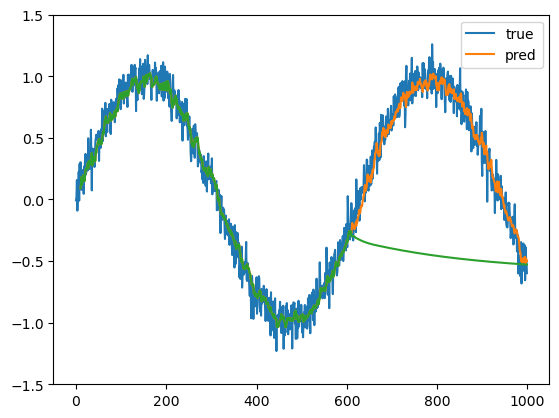

In [36]:
def plot_data(data,legend=0,xlim=0):
    fig,axes = plt.subplots(1,1)
    length = max([len(i) for i in data])
    x = [i for i in range(length)]
    axes.plot(x,data[0])
    axes.plot(x[tau:],data[1])
    axes.plot(x[tau:],data[2][:1000-tau])
    axes.set_ylim((-1.5,1.5))
    axes.legend(['true','pred'])
    plt.show()
plot_data([list(y.detach().numpy()),x_pred,x_pred_affter600])